In [88]:
#Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.utils import class_weight
import keras
from keras.layers import Input,Dense,LeakyReLU,Dropout
from keras.activations import sigmoid,softmax
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt
def gpa_to_grades(pred):
    grades = np.zeros(shape=pred.shape).tolist()
    for i in range(len(pred)):
        for j in range(len(pred[i])):
            if(pred[i][j]>=9.5):
                grades[i][j] ='O'
            elif(pred[i][j]>=8.75 and pred[i][j]<9.5):
                grades[i][j]='A+'
            elif(pred[i][j]>=8.25 and pred[i][j]<8.75):
                grades[i][j] = 'A'
            elif(pred[i][j]>=7.5 and pred[i][j]<8.25):
                grades[i][j] = 'B+'
            elif(pred[i][j]>=6.5 and pred[i][j]<7.5):
                grades[i][j] = 'B'
            elif(pred[i][j]>=5.5 and pred[i][j]<6.5):
                grades[i][j] = 'C'
            elif(pred[i][j]>=5.0 and pred[i][j]<5.5):
                grades[i][j] = 'P'
            elif(pred[i][j]<5.0):
                grades[i][j] = 'F'
    return grades

In [73]:
# Load the preprocessed data
p2 = np.load('p2.npy',allow_pickle=True)
s1 = np.load('s1.npy',allow_pickle=True)
s2 = np.load('s2.npy',allow_pickle=True)
s3 = np.load('s3.npy',allow_pickle=True)
s4 = np.load('s4.npy',allow_pickle=True)

In [82]:
X = np.hstack([p2,s1,s2,s3])
Y = s4
Y.shape

(50, 8)

In [143]:
input_layer = Input((s2.shape[1]+s3.shape[1]+s1.shape[1]+p2.shape[1],))
y = Dense(34,activation='tanh')(input_layer)
y = Dropout(rate=0.8)(y)
y = Dense(32,activation='tanh')(y)
y = Dropout(rate=0.8)(y)
y = Dense(8,activation='tanh')(y)
model = Model(inputs=input_layer,outputs=y)

In [147]:
model.compile(Adam(lr=0.0001),loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 34)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 34)                1190      
_________________________________________________________________
dropout_23 (Dropout)         (None, 34)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1120      
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 264       
Total params: 2,574
Trainable params: 2,574
Non-trainable params: 0
_________________________________________________________________


Train on 20 samples, validate on 30 samples
Epoch 1/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0619 - val_loss: 0.0281
Epoch 2/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0416 - val_loss: 0.0281
Epoch 3/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0559 - val_loss: 0.0281
Epoch 4/1000
20/20 [==============================] - 0s 349us/step - loss: 0.1313 - val_loss: 0.0281
Epoch 5/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0467 - val_loss: 0.0281
Epoch 6/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0463 - val_loss: 0.0281
Epoch 7/1000
20/20 [==============================] - 0s 399us/step - loss: 0.0492 - val_loss: 0.0281
Epoch 8/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0422 - val_loss: 0.0281
Epoch 9/1000
20/20 [==============================] - 0s 349us/step - loss: 0.1054 - val_loss: 0.0281
Epoch 10/1000
20/20 [==================

Epoch 81/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0572 - val_loss: 0.0298
Epoch 82/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0438 - val_loss: 0.0298
Epoch 83/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0561 - val_loss: 0.0297
Epoch 84/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0468 - val_loss: 0.0296
Epoch 85/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0487 - val_loss: 0.0296
Epoch 86/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0576 - val_loss: 0.0296
Epoch 87/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0473 - val_loss: 0.0295
Epoch 88/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0574 - val_loss: 0.0295
Epoch 89/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0509 - val_loss: 0.0294
Epoch 90/1000
20/20 [==============================] - 0s 297us/step - lo

Epoch 160/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0627 - val_loss: 0.0294
Epoch 161/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0562 - val_loss: 0.0294
Epoch 162/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0754 - val_loss: 0.0294
Epoch 163/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0614 - val_loss: 0.0294
Epoch 164/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0409 - val_loss: 0.0294
Epoch 165/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0696 - val_loss: 0.0294
Epoch 166/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0471 - val_loss: 0.0294
Epoch 167/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0644 - val_loss: 0.0294
Epoch 168/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0467 - val_loss: 0.0294
Epoch 169/1000
20/20 [==============================] - 0s 347us

Epoch 239/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0529 - val_loss: 0.0277
Epoch 240/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0549 - val_loss: 0.0277
Epoch 241/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0851 - val_loss: 0.0277
Epoch 242/1000
20/20 [==============================] - 0s 347us/step - loss: 0.1446 - val_loss: 0.0278
Epoch 243/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0509 - val_loss: 0.0278
Epoch 244/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0574 - val_loss: 0.0278
Epoch 245/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0503 - val_loss: 0.0278
Epoch 246/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0506 - val_loss: 0.0279
Epoch 247/1000
20/20 [==============================] - 0s 397us/step - loss: 0.0991 - val_loss: 0.0279
Epoch 248/1000
20/20 [==============================] - 0s 298us

Epoch 318/1000
20/20 [==============================] - 0s 299us/step - loss: 0.1181 - val_loss: 0.0279
Epoch 319/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0417 - val_loss: 0.0279
Epoch 320/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0402 - val_loss: 0.0279
Epoch 321/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0870 - val_loss: 0.0280
Epoch 322/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0475 - val_loss: 0.0280
Epoch 323/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0462 - val_loss: 0.0281
Epoch 324/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0594 - val_loss: 0.0281
Epoch 325/1000
20/20 [==============================] - 0s 348us/step - loss: 0.1205 - val_loss: 0.0281
Epoch 326/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0560 - val_loss: 0.0281
Epoch 327/1000
20/20 [==============================] - 0s 249us

Epoch 397/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0428 - val_loss: 0.0276
Epoch 398/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0564 - val_loss: 0.0276
Epoch 399/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0416 - val_loss: 0.0275
Epoch 400/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0421 - val_loss: 0.0275
Epoch 401/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0496 - val_loss: 0.0274
Epoch 402/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0498 - val_loss: 0.0274
Epoch 403/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0464 - val_loss: 0.0273
Epoch 404/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0555 - val_loss: 0.0273
Epoch 405/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0482 - val_loss: 0.0272
Epoch 406/1000
20/20 [==============================] - 0s 249us

Epoch 476/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0315 - val_loss: 0.0276
Epoch 477/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0429 - val_loss: 0.0276
Epoch 478/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0421 - val_loss: 0.0275
Epoch 479/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0490 - val_loss: 0.0275
Epoch 480/1000
20/20 [==============================] - 0s 248us/step - loss: 0.0415 - val_loss: 0.0275
Epoch 481/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0465 - val_loss: 0.0274
Epoch 482/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0406 - val_loss: 0.0274
Epoch 483/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0423 - val_loss: 0.0273
Epoch 484/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0456 - val_loss: 0.0273
Epoch 485/1000
20/20 [==============================] - 0s 299us

Epoch 555/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0379 - val_loss: 0.0266
Epoch 556/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0478 - val_loss: 0.0265
Epoch 557/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0490 - val_loss: 0.0265
Epoch 558/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0634 - val_loss: 0.0264
Epoch 559/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0419 - val_loss: 0.0264
Epoch 560/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0407 - val_loss: 0.0263
Epoch 561/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0381 - val_loss: 0.0263
Epoch 562/1000
20/20 [==============================] - 0s 248us/step - loss: 0.0606 - val_loss: 0.0263
Epoch 563/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0451 - val_loss: 0.0262
Epoch 564/1000
20/20 [==============================] - 0s 250us

Epoch 634/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0491 - val_loss: 0.0256
Epoch 635/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0348 - val_loss: 0.0256
Epoch 636/1000
20/20 [==============================] - 0s 248us/step - loss: 0.0361 - val_loss: 0.0256
Epoch 637/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0396 - val_loss: 0.0255
Epoch 638/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0447 - val_loss: 0.0255
Epoch 639/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0392 - val_loss: 0.0255
Epoch 640/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0440 - val_loss: 0.0255
Epoch 641/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0412 - val_loss: 0.0255
Epoch 642/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0364 - val_loss: 0.0255
Epoch 643/1000
20/20 [==============================] - 0s 299us

Epoch 713/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0356 - val_loss: 0.0258
Epoch 714/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0515 - val_loss: 0.0259
Epoch 715/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0387 - val_loss: 0.0259
Epoch 716/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0381 - val_loss: 0.0259
Epoch 717/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0403 - val_loss: 0.0259
Epoch 718/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0493 - val_loss: 0.0259
Epoch 719/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0415 - val_loss: 0.0259
Epoch 720/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0378 - val_loss: 0.0259
Epoch 721/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0455 - val_loss: 0.0259
Epoch 722/1000
20/20 [==============================] - 0s 297us

Epoch 792/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0360 - val_loss: 0.0266
Epoch 793/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0417 - val_loss: 0.0266
Epoch 794/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0504 - val_loss: 0.0266
Epoch 795/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0387 - val_loss: 0.0266
Epoch 796/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0494 - val_loss: 0.0266
Epoch 797/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0439 - val_loss: 0.0266
Epoch 798/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0453 - val_loss: 0.0266
Epoch 799/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0433 - val_loss: 0.0266
Epoch 800/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0444 - val_loss: 0.0265
Epoch 801/1000
20/20 [==============================] - 0s 299us

Epoch 871/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0456 - val_loss: 0.0250
Epoch 872/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0368 - val_loss: 0.0251
Epoch 873/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0349 - val_loss: 0.0251
Epoch 874/1000
20/20 [==============================] - 0s 349us/step - loss: 0.0342 - val_loss: 0.0251
Epoch 875/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0398 - val_loss: 0.0251
Epoch 876/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0393 - val_loss: 0.0252
Epoch 877/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0354 - val_loss: 0.0252
Epoch 878/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0572 - val_loss: 0.0252
Epoch 879/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0417 - val_loss: 0.0252
Epoch 880/1000
20/20 [==============================] - 0s 299us

Epoch 950/1000
20/20 [==============================] - 0s 298us/step - loss: 0.0333 - val_loss: 0.0256
Epoch 951/1000
20/20 [==============================] - 0s 298us/step - loss: 0.1262 - val_loss: 0.0256
Epoch 952/1000
20/20 [==============================] - 0s 347us/step - loss: 0.0376 - val_loss: 0.0257
Epoch 953/1000
20/20 [==============================] - 0s 399us/step - loss: 0.0476 - val_loss: 0.0257
Epoch 954/1000
20/20 [==============================] - 0s 248us/step - loss: 0.0424 - val_loss: 0.0257
Epoch 955/1000
20/20 [==============================] - 0s 248us/step - loss: 0.0449 - val_loss: 0.0257
Epoch 956/1000
20/20 [==============================] - 0s 299us/step - loss: 0.0518 - val_loss: 0.0257
Epoch 957/1000
20/20 [==============================] - 0s 297us/step - loss: 0.0498 - val_loss: 0.0258
Epoch 958/1000
20/20 [==============================] - 0s 249us/step - loss: 0.0293 - val_loss: 0.0258
Epoch 959/1000
20/20 [==============================] - 0s 299us

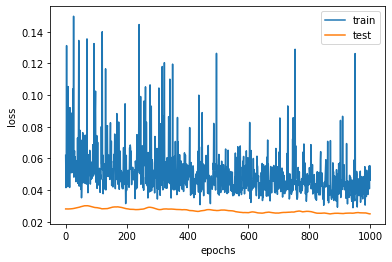

In [153]:
history = model.fit(X,Y,validation_split=0.6,epochs=1000,callbacks=[ModelCheckpoint('best_model.hdf5',monitor='val_loss',mode='min')],shuffle=True)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [154]:
x_test = X[40:]
y_test = Y[40:]
model.load_weights('best_model.hdf5')
pred = model.predict(x_test)
rmse = np.sqrt(np.mean(np.square((y_test-pred)*10)))
print('Totatl RMSE :',rmse)

Totatl RMSE : 1.6365346956901279


7.610525548911272 - dense (32,64,8) dropout(0.8) tanh epochs-1000
2.7823069733661554 - dense (16,64,8) dropout(0.8) tanh epochs-1000
2.6685555429057035 - dense (16,32,8) dropout(0.8) tanh epochs-1000
1.2885527835308819 - dense (16,32,8) dropout(0.8) tanh epochs-2000
1.5446398087044575 - dense (8,32,8) dropout(0.8) tanh epochs-2000
When new modified input layer
1.5696501608751803 - dense (64,32,8) dropout(0.8) tanh epochs-2000
1.2276016913722259 - dense (64,32,8) dropout(0.8) tanh epochs-3000
1.1862156896568599 - dense (64,32,8) dropout(0.8) tanh epochs-3000 -- lr= 0.0001
1.8745081222918838 - dense (32,16,8) dropout(0.8) tanh epochs-1000
1.695125063109147 - dense (34,32,8) dropout(0.8) tanh epochs-1000
2.4045800229461487 - dense (34,32,8) dropout(0.8) tanh epochs-1000 with sgd optimizer

In [155]:
np.round(pred*10),np.round((y_test*10).astype('float32'))

(array([[8., 7., 7., 8., 7., 9., 9., 8.],
        [9., 8., 8., 8., 8., 9., 9., 9.],
        [8., 8., 8., 7., 7., 9., 9., 9.],
        [8., 8., 8., 8., 7., 9., 9., 9.],
        [8., 7., 7., 7., 6., 8., 8., 9.],
        [8., 7., 7., 8., 7., 9., 9., 9.],
        [8., 7., 8., 7., 7., 9., 9., 9.],
        [8., 8., 8., 7., 7., 9., 9., 9.],
        [8., 7., 8., 8., 7., 9., 9., 9.],
        [8., 7., 7., 7., 7., 9., 9., 8.]], dtype=float32),
 array([[10.,  8.,  5.,  8.,  8., 10., 10., 10.],
        [ 8.,  6.,  7.,  8.,  8.,  8.,  5., 10.],
        [ 6.,  5.,  6.,  6.,  5.,  8.,  7.,  5.],
        [ 7.,  7.,  7.,  7.,  6.,  8.,  8.,  5.],
        [ 6.,  5.,  7.,  4.,  4.,  8.,  8., 10.],
        [ 6.,  6.,  5.,  4.,  4.,  8.,  8., 10.],
        [ 7.,  7.,  8.,  6.,  7.,  8., 10., 10.],
        [ 6.,  7.,  6.,  6.,  6.,  8.,  7.,  8.],
        [ 7.,  6.,  7.,  6.,  5.,  8.,  7.,  8.],
        [ 8.,  6.,  6.,  7.,  6.,  8.,  8.,  5.]], dtype=float32))

In [156]:
y_pred_inv = gpa_to_grades(pred*10)
y_test_inv = gpa_to_grades(y_test*10)

In [157]:
y_pred_inv,y_test_inv

([['B+', 'B', 'B', 'B+', 'B', 'A+', 'A+', 'B+'],
  ['A', 'B+', 'B+', 'B+', 'B+', 'A+', 'A+', 'A+'],
  ['A', 'B+', 'B+', 'B', 'B', 'A+', 'A', 'A+'],
  ['A', 'B+', 'B+', 'B+', 'B', 'A+', 'A+', 'A+'],
  ['B+', 'B', 'B', 'B', 'C', 'A', 'B+', 'A+'],
  ['B+', 'B', 'B', 'B+', 'B', 'A', 'A', 'A+'],
  ['A', 'B', 'B+', 'B', 'B', 'A+', 'A', 'A+'],
  ['A', 'B+', 'B+', 'B', 'B', 'A+', 'A+', 'A+'],
  ['A', 'B', 'B+', 'B+', 'B', 'A+', 'A', 'A+'],
  ['B+', 'B', 'B', 'B', 'B', 'A+', 'A', 'A']],
 [['O', 'B+', 'P', 'B+', 'B+', 'O', 'O', 'O'],
  ['A', 'C', 'B', 'B+', 'B+', 'A', 'P', 'O'],
  ['C', 'P', 'C', 'C', 'P', 'B+', 'B', 'P'],
  ['B', 'B', 'B', 'B', 'C', 'A', 'B+', 'P'],
  ['C', 'P', 'B', 'F', 'F', 'B+', 'B+', 'O'],
  ['C', 'C', 'P', 'F', 'F', 'B+', 'B+', 'O'],
  ['B', 'B', 'B+', 'C', 'B', 'B+', 'O', 'O'],
  ['C', 'B', 'C', 'C', 'C', 'B+', 'B', 'B+'],
  ['B', 'C', 'B', 'C', 'P', 'B+', 'B', 'A'],
  ['B+', 'C', 'C', 'B', 'C', 'A', 'B+', 'P']])